<a href="https://colab.research.google.com/github/MuhammadAbuSufian/deep-learning/blob/main/CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch

In [3]:
# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [4]:
# Define the function to create an image grid
def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

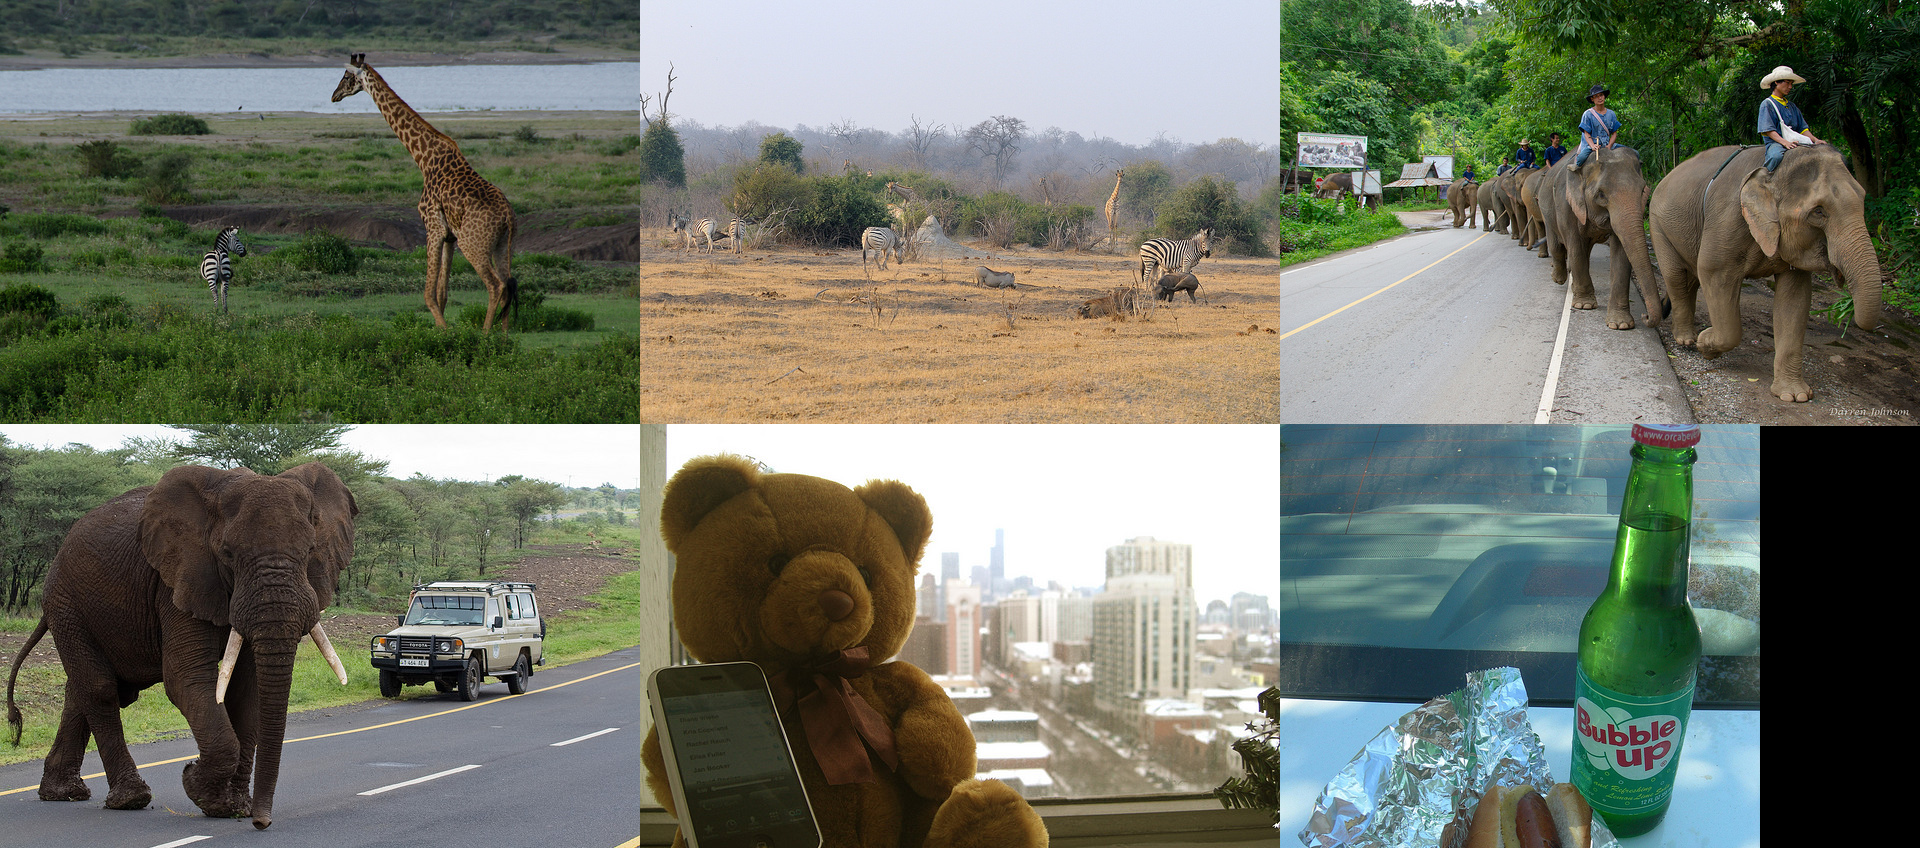

In [5]:
# Define the URLs of images from the COCO dataset
image_urls = [
    'http://images.cocodataset.org/val2014/COCO_val2014_000000159977.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000311295.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000457834.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000555472.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000174070.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000460929.jpg'
]

# Load images from URLs
images = []
for url in image_urls:
    images.append(Image.open(requests.get(url, stream=True).raw))

# Display images in a grid
grid = image_grid(images, cols=3)
display(grid)

In [6]:
# Perform image classification
classes = ['giraffe', 'zebra', 'elephant']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True, do_convert_rgb=False)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # This is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # Calculate softmax probabilities

# Print the classification results
for i, prob in enumerate(probs):
    pred_class_idx = torch.argmax(prob)
    pred_class = classes[pred_class_idx]
    print(f"Image {i+1}: Predicted class is '{pred_class}' with probability {prob[pred_class_idx]:.2f}")

Image 1: Predicted class is 'giraffe' with probability 0.86
Image 2: Predicted class is 'elephant' with probability 0.46
Image 3: Predicted class is 'elephant' with probability 1.00
Image 4: Predicted class is 'elephant' with probability 0.98
Image 5: Predicted class is 'elephant' with probability 0.60
Image 6: Predicted class is 'elephant' with probability 0.67
